In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import plotly.graph_objects as go
import json

import random

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv')
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv')
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv')
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv')
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv')
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
df_fatalities.isnull().any()


In [13]:
df_hh_income.isnull().any()

Geographic Area    False
City               False
Median Income      False
dtype: bool

In [5]:
df_pct_poverty.isnull().any()


False

In [6]:
df_share_race_city.isnull().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [7]:
df_hh_income.duplicated().values.any()

False

In [14]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)

In [9]:
df_pct_poverty.duplicated().values.any()

False

In [10]:
df_fatalities.duplicated().values.any()

False

In [11]:
df_pct_completed_hs.duplicated().values.any()

False

In [12]:
df_share_race_city.duplicated().values.any()


False

In [15]:
df_pct_completed_hs.nunique()


Geographic Area            51
City                    24255
percent_completed_hs      728
dtype: int64

In [16]:
df_pct_completed_hs.replace('-', np.nan, regex=True, inplace=True)

In [17]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)

/var/folders/2b/d49gl1791pz5p5477nf69dv40000gn/T/ipykernel_72640/2716862025.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(graduated.index[n],graduated[n])


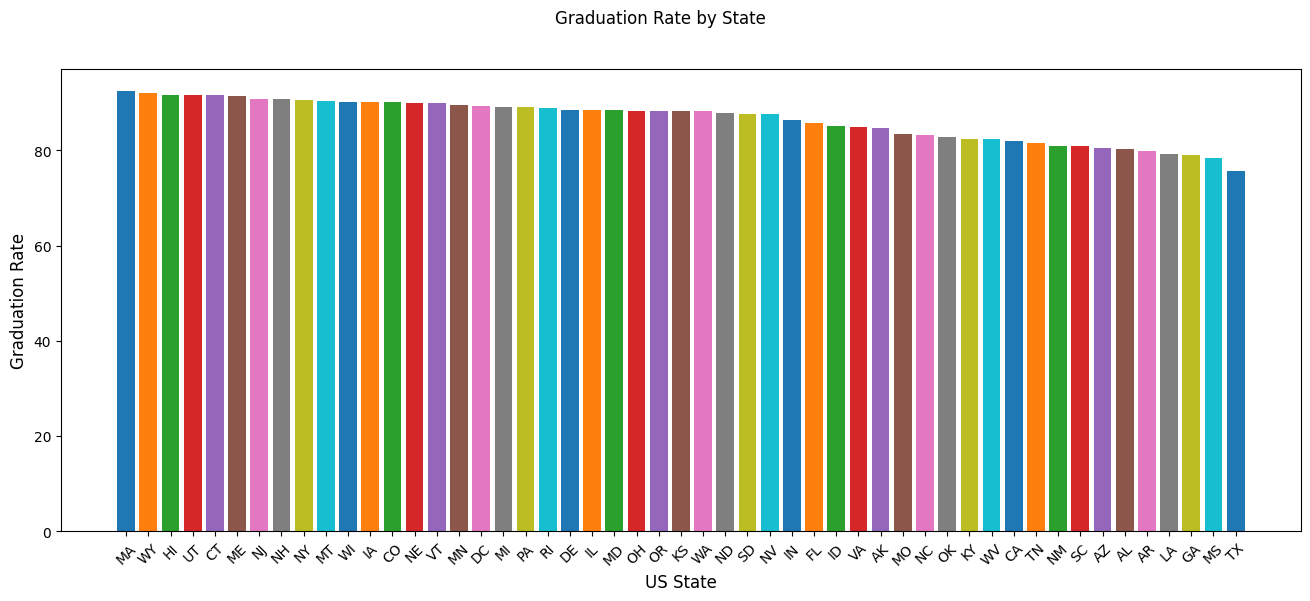

In [20]:
graduated = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,6))
plt.suptitle('Graduation Rate by State')
plt.ylabel('Graduation Rate', fontsize =12)
plt.xlabel('US State', fontsize=12)
for n in range(len(graduated)):
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.bar(graduated.index[n],graduated[n])

plt.show()

In [ ]:
poverty_rates = df_pct_poverty['poverty_rate'].sort_values(by=['Geographic Area'],ascending=False)

df_pct_poverty.poverty_rate.unique()
df_pct_poverty.replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)
poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate by State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(poverty)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(poverty.index[n], poverty[n])

plt.show()


In [21]:
df_share_race_city.nunique()
df_share_race_city.replace('-', np.nan, regex=True, inplace=True)
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')
racial_makeup = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
color_list = list(colors._colors_full_map.values())
print(racial_makeup.head())


                 share_white  share_black  share_native_american  share_asian  \
Geographic area                                                                 
AK                 45.650000     0.567330              45.864773     1.388352   
AL                 72.507266    23.322318               0.659343     0.479758   
AR                 78.449538    16.296858               0.759889     0.477079   
AZ                 59.929047     0.954545              28.589800     0.726608   
CA                 71.866293     2.692018               1.723087     5.568206   

                 share_hispanic  
Geographic area                  
AK                     2.149148  
AL                     2.980104  
AR                     4.273013  
AZ                    20.144568  
CA                    29.649868  


/var/folders/2b/d49gl1791pz5p5477nf69dv40000gn/T/ipykernel_72640/1410297196.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(racial_makeup.index[n], racial_makeup['share_white'][n],color=color_list[49])
/var/folders/2b/d49gl1791pz5p5477nf69dv40000gn/T/ipykernel_72640/1410297196.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(racial_makeup.index[n], racial_makeup['share_black'][n],color=color_list[59])
/var/folders/2b/d49gl1791pz5p5477nf69dv40000gn/T/ipykernel_72640/1410297196.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wil

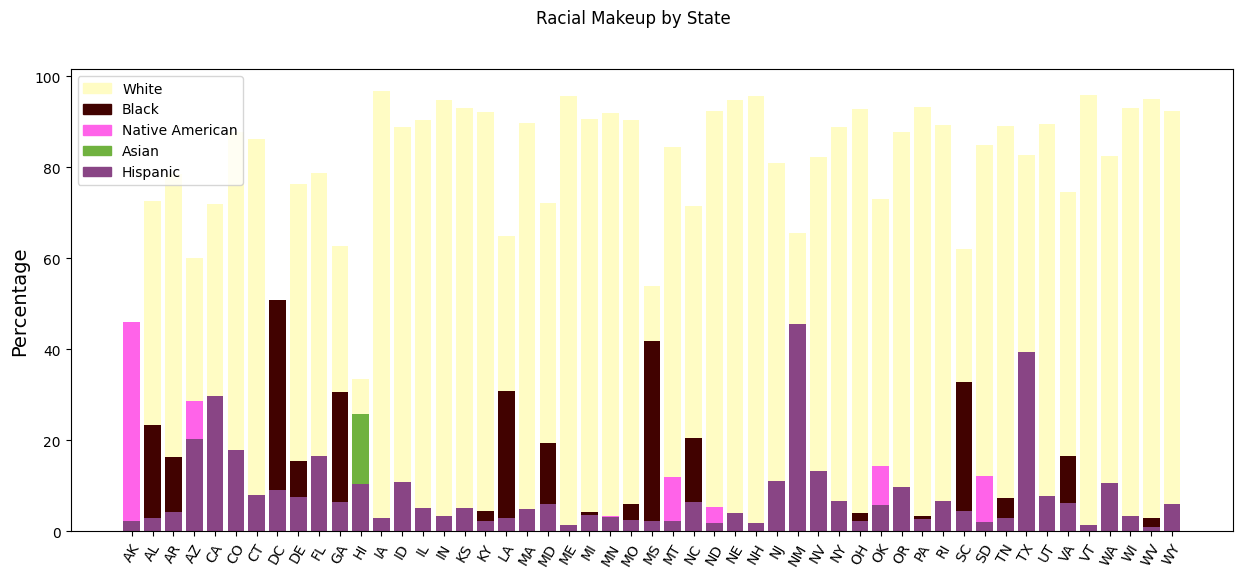

In [23]:
x_indexes = np.arange(len(racial_makeup))

plt.figure(figsize=(15, 6))
plt.suptitle('Racial Makeup by State')
plt.ylabel('Percentage', fontsize=14)
labels = []
for n in range(len(racial_makeup)):
    plt.bar(racial_makeup.index[n], racial_makeup['share_white'][n],color=color_list[49])
    plt.bar(racial_makeup.index[n], racial_makeup['share_black'][n],color=color_list[59])
    plt.bar(racial_makeup.index[n], racial_makeup['share_native_american'][n], color=color_list[41])
    plt.bar(racial_makeup.index[n], racial_makeup['share_asian'][n], color=color_list[6])
    plt.bar(racial_makeup.index[n], racial_makeup['share_hispanic'][n], color=color_list[5])
    labels.append(racial_makeup.index[n])

w_legend = mpatches.Patch(label="White", color=color_list[49])
b_legend = mpatches.Patch(label="Black", color=color_list[59])
n_legend = mpatches.Patch(label="Native American", color=color_list[41])
a_legend = mpatches.Patch(label="Asian", color=color_list[6])
h_legend = mpatches.Patch(label="Hispanic", color=color_list[5])

plt.legend(handles=[w_legend, b_legend, n_legend, a_legend, h_legend])
plt.xticks(ticks=x_indexes, labels=labels, fontsize=10, rotation=60)
plt.yticks(fontsize = 10)
plt.show()

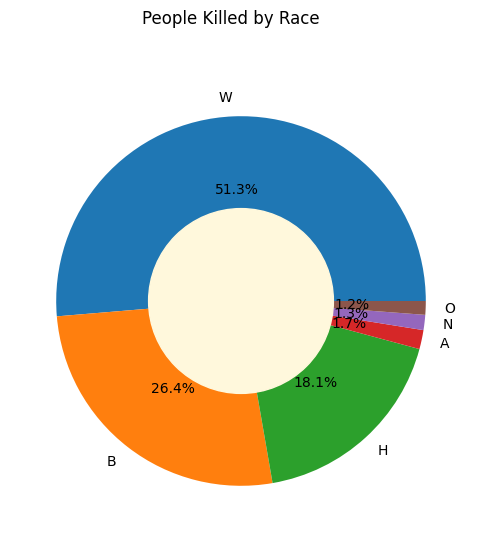

In [24]:
race_killed = df_fatalities.race.value_counts()

df_fatalities.race.unique()

plt.figure(figsize=(8,6))
plt.suptitle('People Killed by Race')
plt.pie(race_killed, labels=race_killed.index, autopct='%1.1f%%')
pie_circle=plt.Circle( (0,0), 0.5, color='cornsilk')
p=plt.gcf()
p.gca().add_artist(pie_circle)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

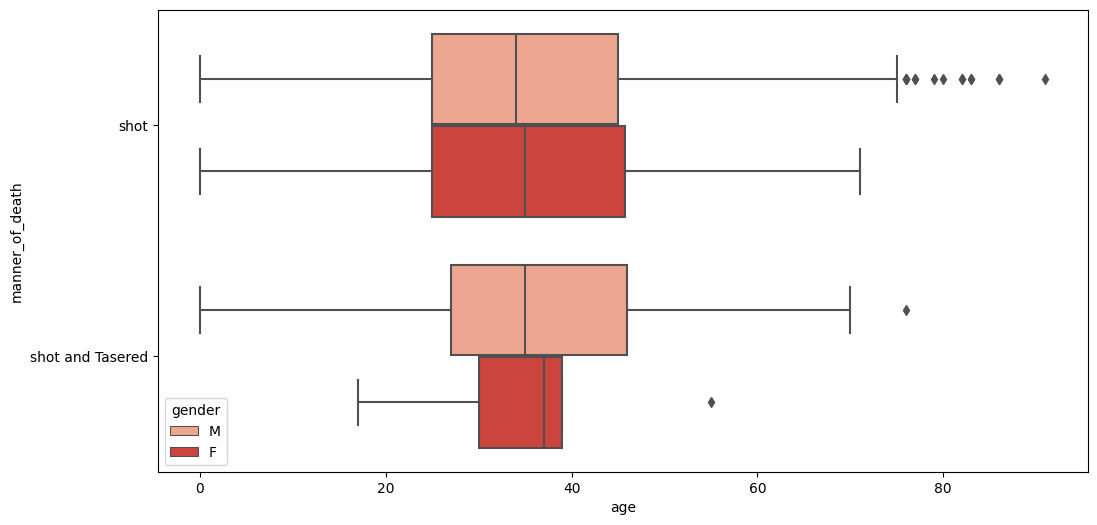

In [25]:
df_fatalities['age'] = df_fatalities['age'].replace(np.nan, 0)
df_fatalities.age.isnull().any()
death_by_age_gender_manner = df_fatalities[['age', 'manner_of_death', 'gender']]
fig = plt.figure(figsize = (12,6))
sns.boxplot(x='age', y='manner_of_death', hue='gender',data=death_by_age_gender_manner, palette="Reds")
plt.show()

In [26]:
under = df_fatalities.loc[df_fatalities['age'] < 25]
num_under = under.id.count()
over =  df_fatalities.loc[df_fatalities['age'] > 25]
num_over = over.id.count()
print(f'{round((num_under / num_over) * 100)} % were under 25.')

28 % were under 25.


/var/folders/2b/d49gl1791pz5p5477nf69dv40000gn/T/ipykernel_72640/1766409490.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(weapons_count.index[w], weapons_count[w])


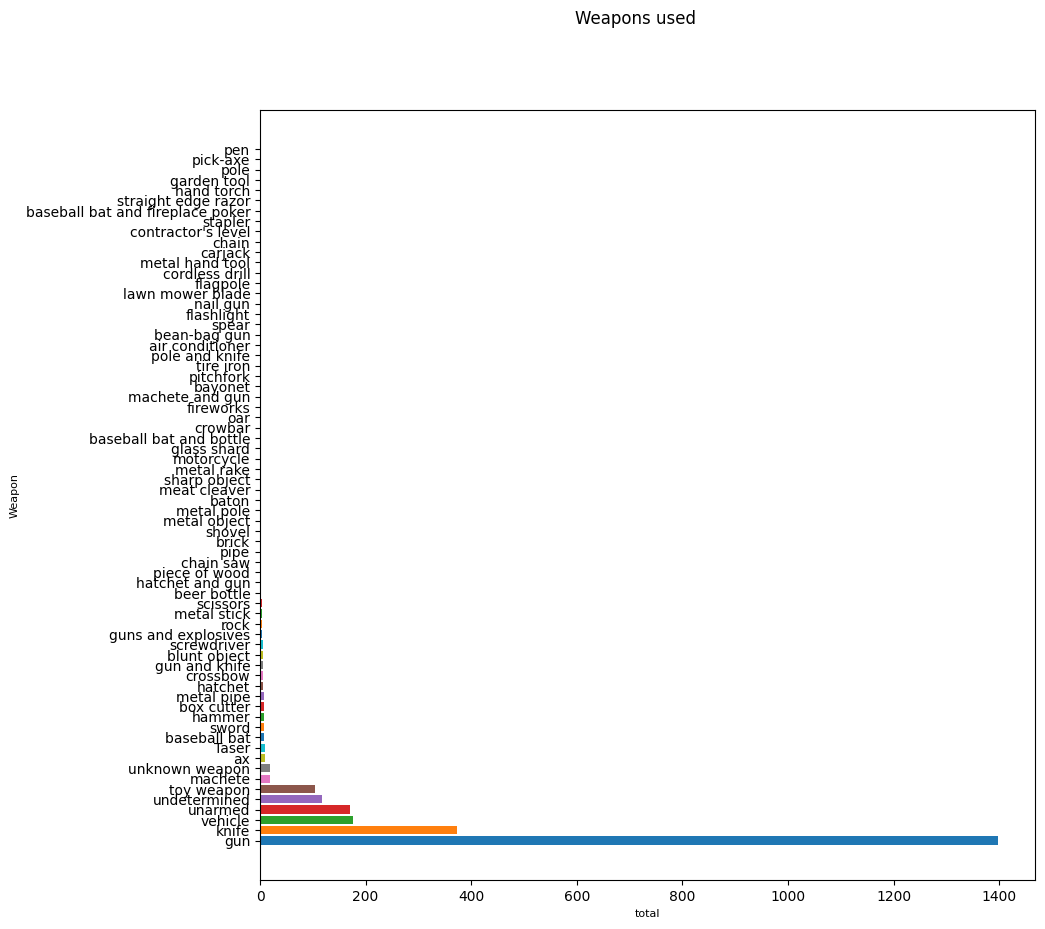

In [29]:
weapons_count = df_fatalities.armed.value_counts()
plt.figure(figsize=(10,10))
plt.suptitle('Weapons used')
plt.ylabel('Weapon', fontsize=8)
plt.xlabel('total', fontsize=8)

for w in range(len(weapons_count)):
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.barh(weapons_count.index[w], weapons_count[w])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


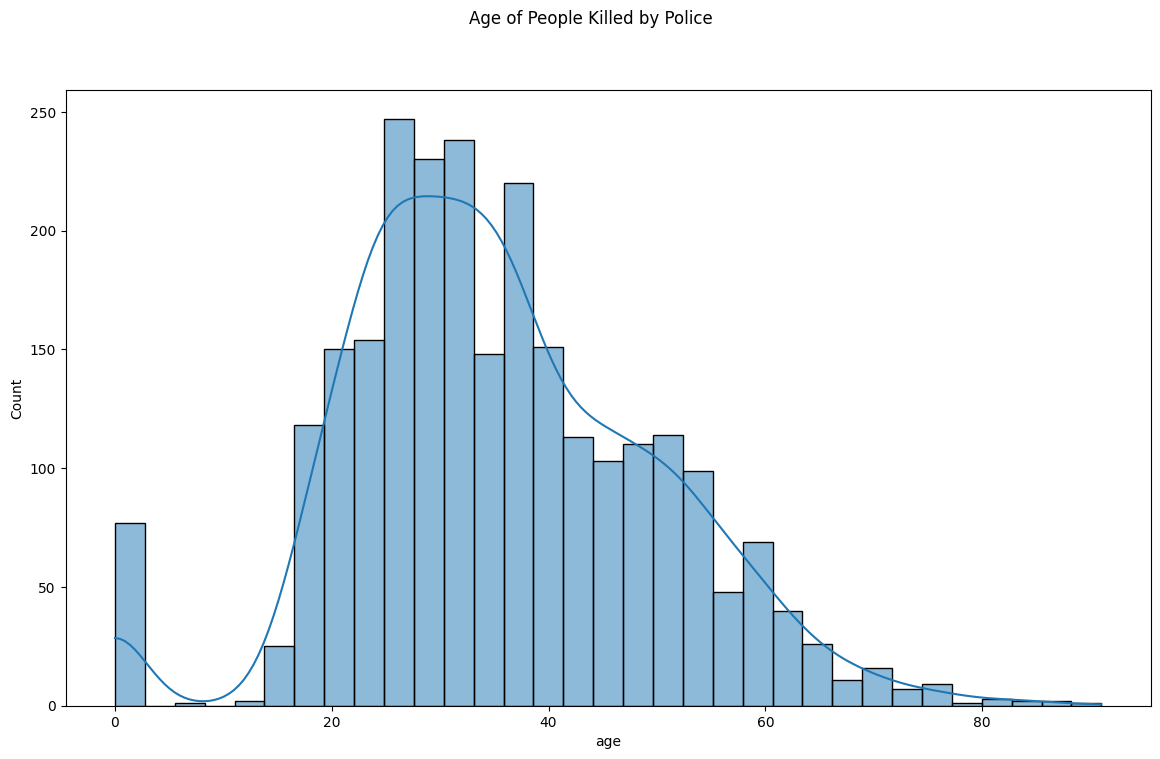

In [30]:
plt.figure(figsize=(14,8))
plt.suptitle('Age of People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

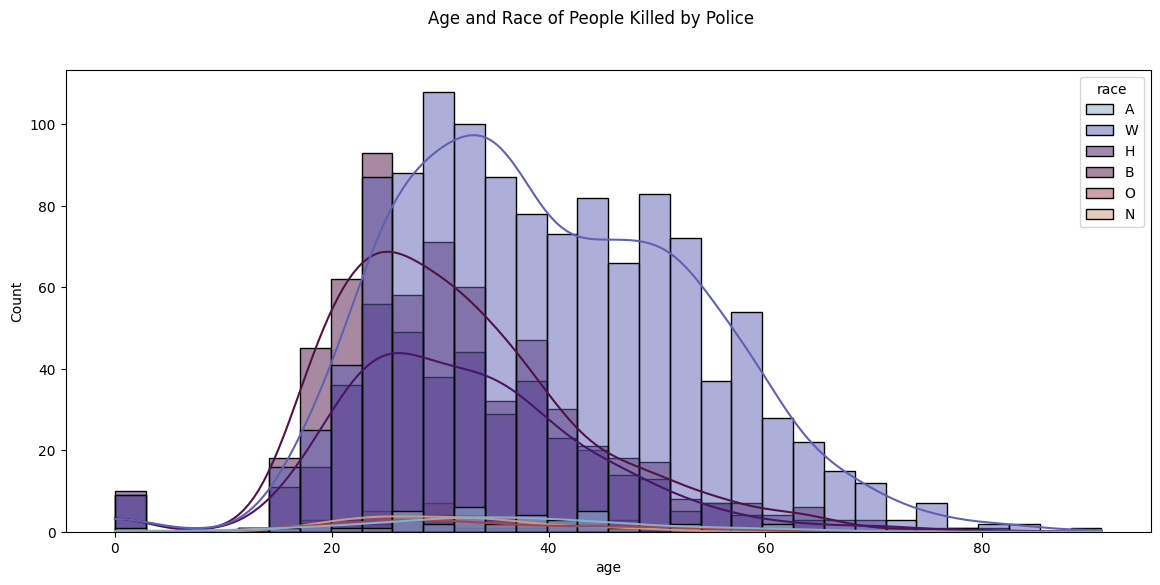

In [31]:
plt.figure(figsize=(14,6))
plt.suptitle('Age and Race of People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True, hue='race', element='bars',palette='twilight')
# sns.histplot(data=, x=, kde=, hue=, element=,palette=)
plt.show()

In [33]:
def custom_autopct(values):
    def this_autopct(pct):         
        total = sum(values)
        val = int(round(pct*total/100.0))         
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return this_autopct

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64


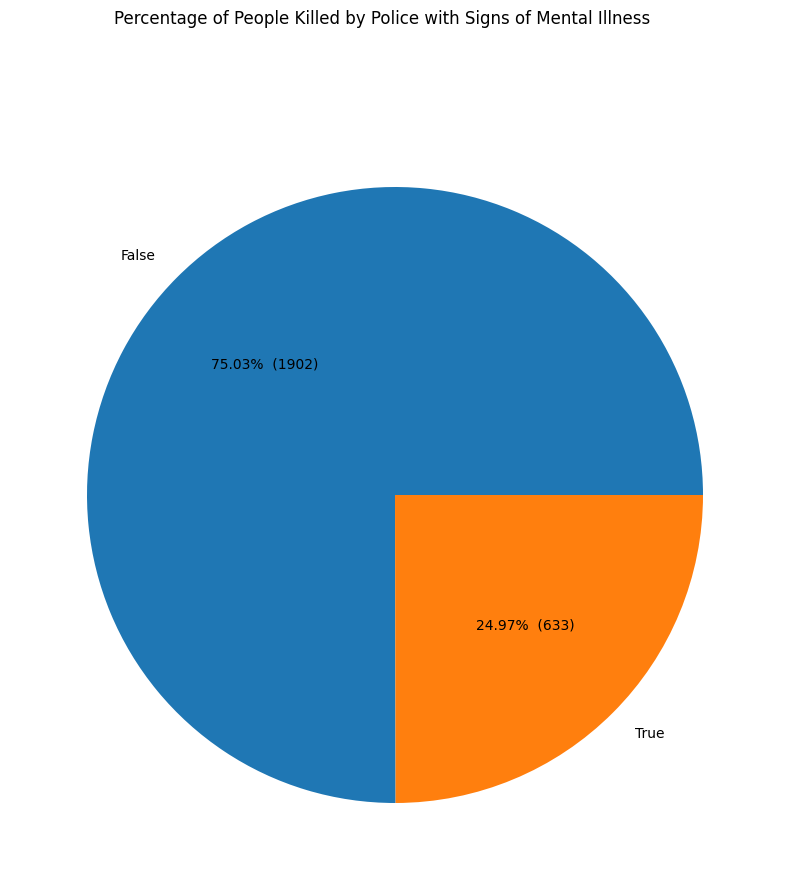

In [34]:
mental_illness = df_fatalities.signs_of_mental_illness.value_counts()
print(mental_illness)
plt.figure(figsize=(10,10))
plt.suptitle("Percentage of People Killed by Police with Signs of Mental Illness")
plt.pie(mental_illness, labels=mental_illness.index,autopct=custom_autopct(mental_illness))
plt.show()

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64


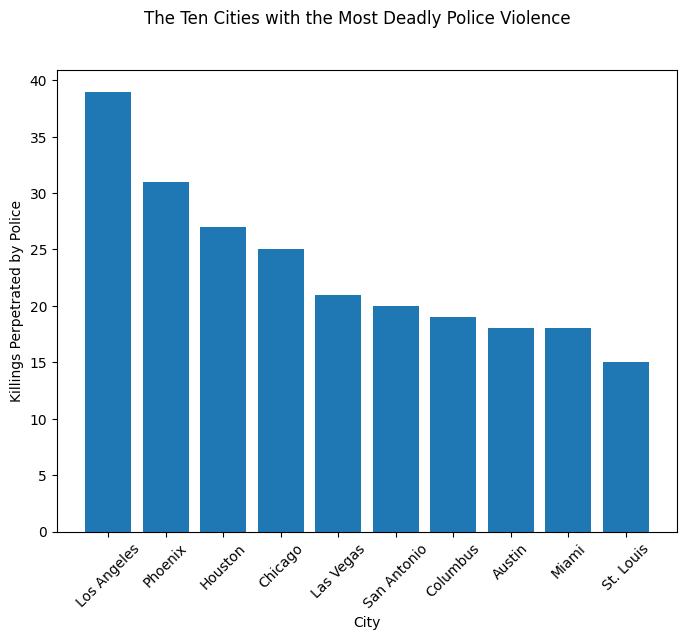

In [36]:
cities_with_most_deaths = df_fatalities.city.value_counts().head(10)
print(cities_with_most_deaths)
plt.figure(figsize = (8,6))
plt.suptitle("The Ten Cities with the Most Deadly Police Violence")
plt.ylabel('Killings Perpetrated by Police', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.bar(cities_with_most_deaths.index, cities_with_most_deaths, label=cities_with_most_deaths.index, linewidth=5)
plt.show()


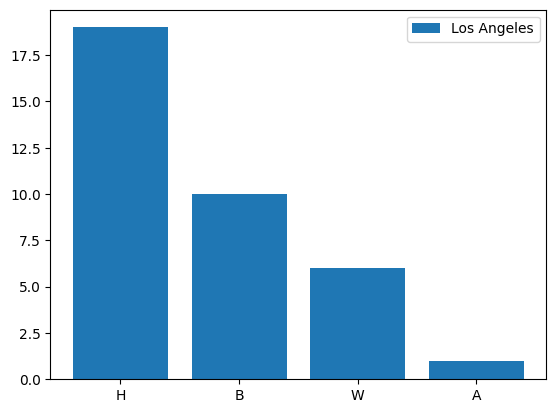

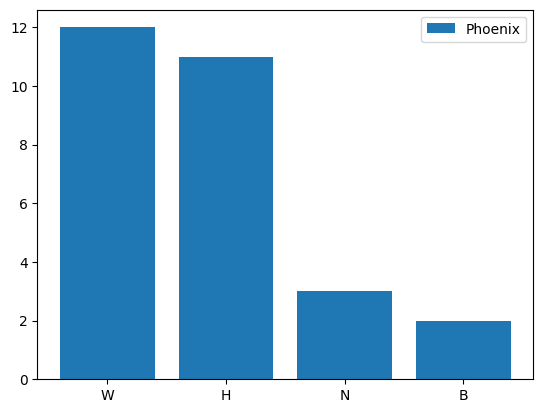

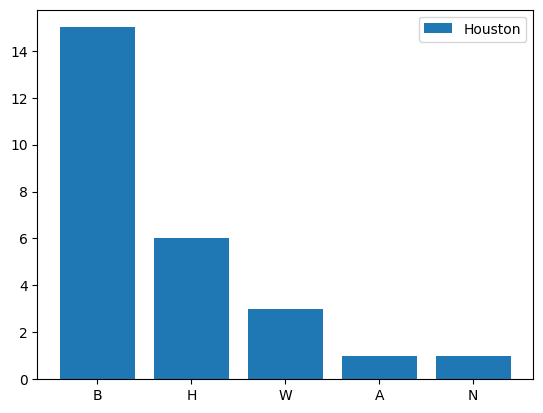

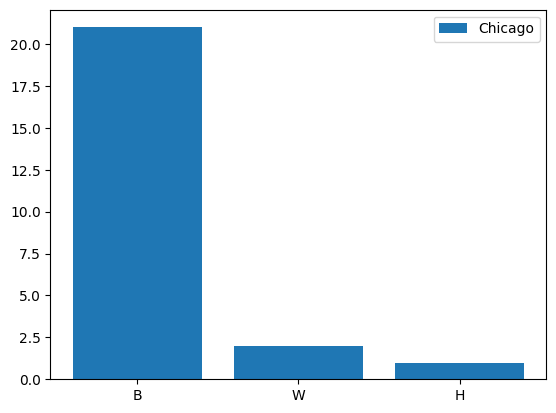

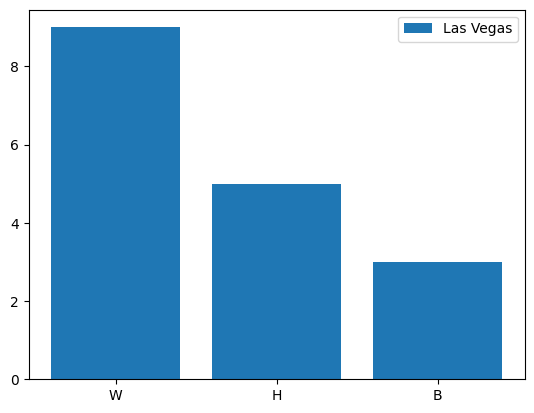

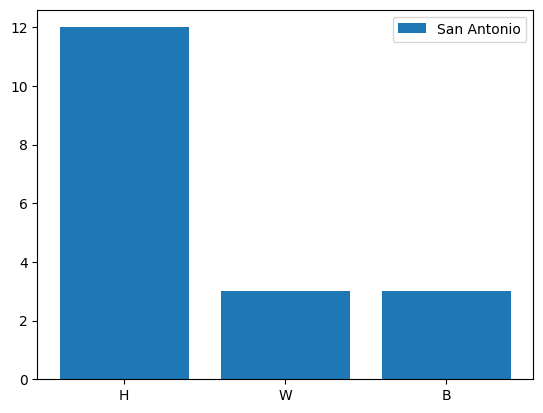

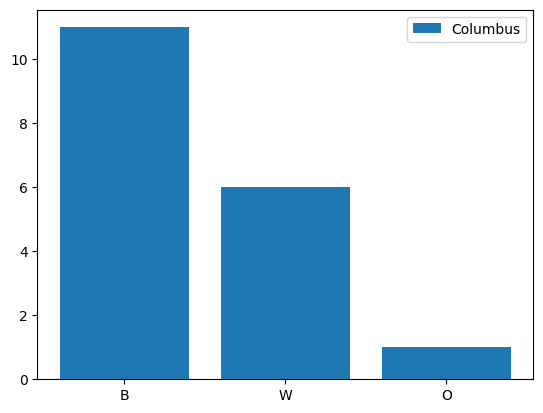

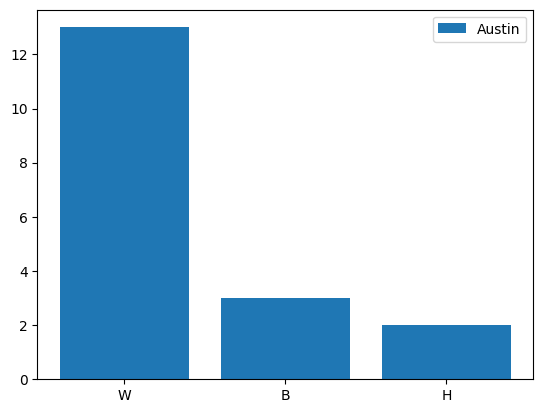

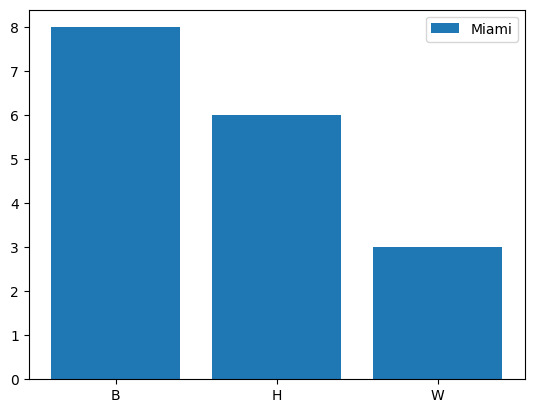

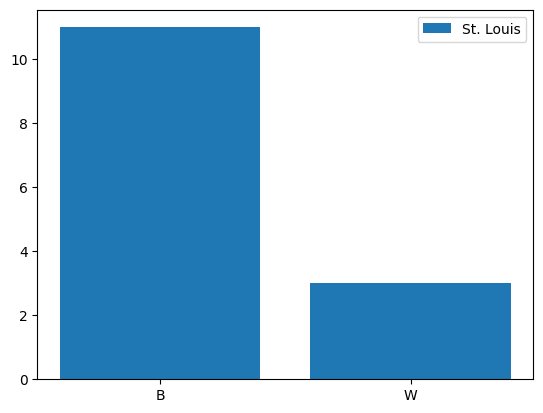

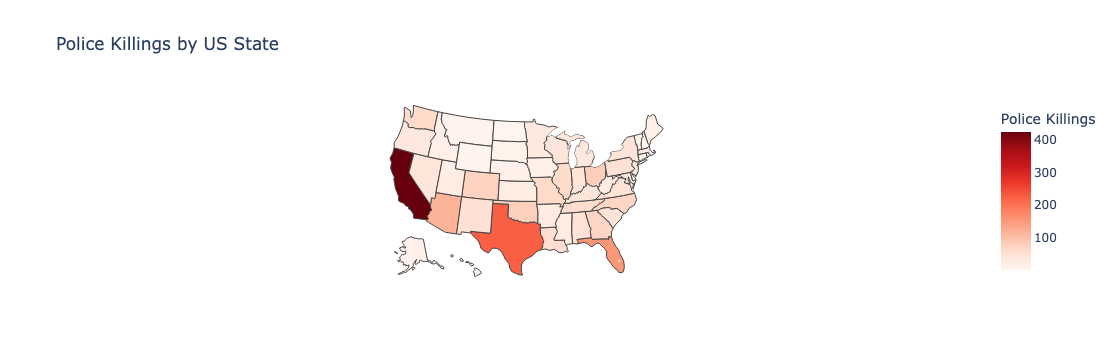

In [37]:
most_dangerous = df_fatalities[['city', 'race']]
for c in cities.index:
    most_dangerous_cities = most_dangerous.loc[most_dangerous['city'] == c]
    city = most_dangerous_cities.race.value_counts()
    plt.bar(city.index, city, label=c)
    plt.legend(loc='best')
    plt.show()
states_to_map = df_fatalities.groupby('state').size().sort_values(ascending=False)
fig = go.Figure(data=go.Choropleth(
    locations=states_to_map.index,
    z = states_to_map,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa',
)

fig.show()

/var/folders/2b/d49gl1791pz5p5477nf69dv40000gn/T/ipykernel_72640/1191637474.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



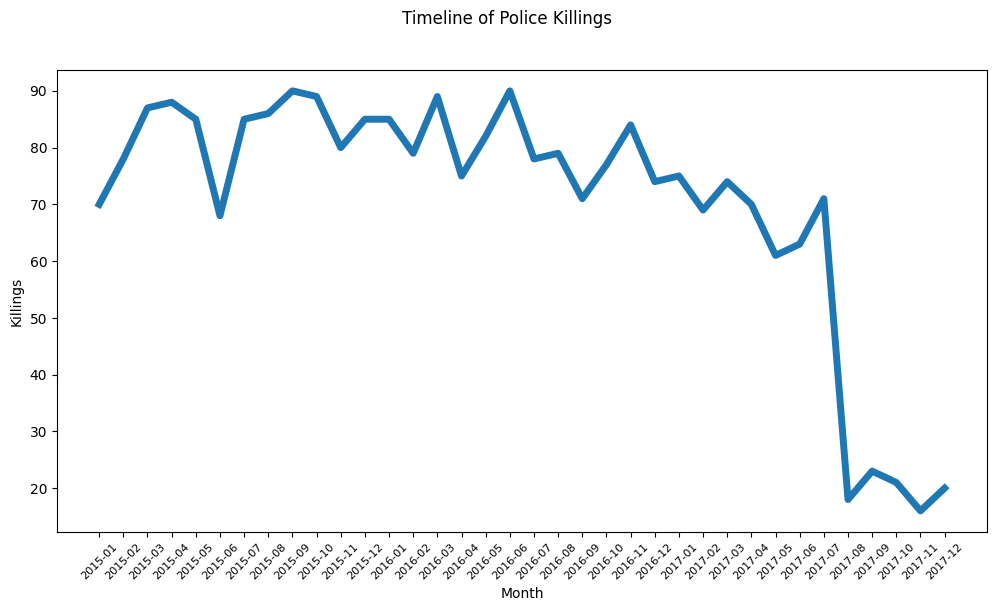

In [38]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities.date = pd.to_datetime(monthly_fatalities.date).dt.to_period('m')
monthly_fatalities.date = monthly_fatalities.date.astype(str)
timeline = monthly_fatalities.groupby('date').size()
plt.figure(figsize=(12,6))
plt.plot(timeline.index, timeline, linewidth=5)
plt.xticks(ticks=timeline.index, fontsize=8, rotation=45)
plt.suptitle('Timeline of Police Killings')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Killings', fontsize=10)
plt.show()
